In [17]:
import pandas as pd 

data = pd.read_csv("data/counts_normalized_log2_shortlabels.csv")
data

,Gene_Name,ARN_DHT_R1,ARN_DHT_R2,BIC_DHT_R1,BIC_DHT_R2,CTL_DHT_R1,CTL_DHT_R2,ENZ_DHT_R1,ENZ_DHT_R2
0,A1BG,8.744624,7.910898,8.120633,7.754471,7.813781,8.044341,8.912943,7.910619
1,A1BG-AS1,8.866078,8.585575,8.686505,8.472798,8.588715,8.322901,8.886718,8.616526
2,A1CF,5.273291,4.907101,4.640495,5.133134,3.000000,3.331796,5.159085,4.971521
3,A2M,4.344827,3.723817,2.582046,3.983977,3.459432,4.114662,3.717614,3.614688
4,A2M-AS1,6.179589,6.154233,5.777922,6.202302,5.727920,5.838587,5.706739,5.999977
...,...,...,...,...,...,...,...,...,...
39369,ZYG11A,6.833167,6.602474,6.581498,6.172963,6.303781,6.010789,6.290488,6.560310
39370,ZYG11B,10.219262,11.092731,10.653820,11.024912,10.710806,10.895888,10.053771,10.912960
39371,ZYX,11.478077,10.957510,11.194331,10.741136,11.661333,11.003043,11.418783,10.958529
39372,ZZEF1,11.625184,11.721834,11.876083,11.626989,12.298349,12.027975,11.582944,11.647604


In [27]:
# Vamos a calcular las medias de expresion y las desviaciones estandar (de la segunda columna en adelante)
stds = data.iloc[:, 1:].std(axis=1)
# Eliminamos las filas donde la desviacion estandar es 0
data_filtered = data[stds > 1e-4]
data_filtered

,Gene_Name,ARN_DHT_R1,ARN_DHT_R2,BIC_DHT_R1,BIC_DHT_R2,CTL_DHT_R1,CTL_DHT_R2,ENZ_DHT_R1,ENZ_DHT_R2
0,A1BG,8.744624,7.910898,8.120633,7.754471,7.813781,8.044341,8.912943,7.910619
1,A1BG-AS1,8.866078,8.585575,8.686505,8.472798,8.588715,8.322901,8.886718,8.616526
2,A1CF,5.273291,4.907101,4.640495,5.133134,3.000000,3.331796,5.159085,4.971521
3,A2M,4.344827,3.723817,2.582046,3.983977,3.459432,4.114662,3.717614,3.614688
4,A2M-AS1,6.179589,6.154233,5.777922,6.202302,5.727920,5.838587,5.706739,5.999977
...,...,...,...,...,...,...,...,...,...
39369,ZYG11A,6.833167,6.602474,6.581498,6.172963,6.303781,6.010789,6.290488,6.560310
39370,ZYG11B,10.219262,11.092731,10.653820,11.024912,10.710806,10.895888,10.053771,10.912960
39371,ZYX,11.478077,10.957510,11.194331,10.741136,11.661333,11.003043,11.418783,10.958529
39372,ZZEF1,11.625184,11.721834,11.876083,11.626989,12.298349,12.027975,11.582944,11.647604


# Analisis de genes "diferencialmente expresados" de acuerdo con el enfoque de Random Forest

Número de genes con importancia > 0 en ARN: 1774
Número de genes con importancia > 0 en BIC: 1684
Número de genes con importancia > 0 en ENZ: 1680


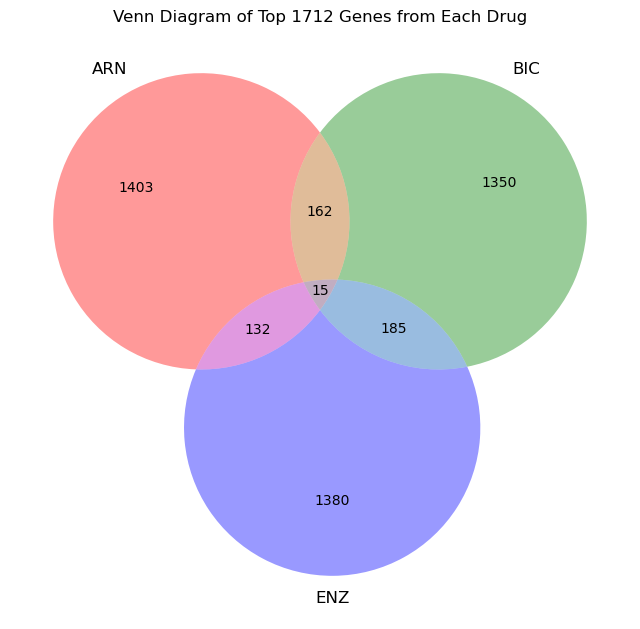

In [28]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

genes_ARN = pd.read_csv("results/RandomForestDE/imp_ARN.csv")
genes_BIC = pd.read_csv("results/RandomForestDE/imp_BIC.csv")
genes_ENZ = pd.read_csv("results/RandomForestDE/imp_ENZ.csv")

# Vamos a contar cuantas filas de genes_ARN tienen en la columna de Importance un valor mayor a 0
print("Número de genes con importancia > 0 en ARN:", (genes_ARN["Importance"] > 0).sum())
print("Número de genes con importancia > 0 en BIC:", (genes_BIC["Importance"] > 0).sum())
print("Número de genes con importancia > 0 en ENZ:", (genes_ENZ["Importance"] > 0).sum())

promedio_genes_importancia_positiva = (
    (genes_ARN["Importance"] > 0).sum() +
    (genes_BIC["Importance"] > 0).sum() +
    (genes_ENZ["Importance"] > 0).sum()
) / 3

top_k = int(promedio_genes_importancia_positiva) # Usamos este valor como k para los top k genes

# Obtenemos los top k genes de cada análisis
top_genes_ARN = genes_ARN["Gene_Name"].head(top_k).tolist()
top_genes_BIC = genes_BIC["Gene_Name"].head(top_k).tolist()
top_genes_ENZ = genes_ENZ["Gene_Name"].head(top_k).tolist()

# Matriz de indices de Jaccard 
jaccard_matrix = pd.DataFrame(index=["ARN", "BIC", "ENZ"], columns=["ARN", "BIC", "ENZ"])
# Calcular índices de Jaccard
for method1, genes1 in [("ARN", top_genes_ARN), ("BIC", top_genes_BIC), ("ENZ", top_genes_ENZ)]:
    for method2, genes2 in [("ARN", top_genes_ARN), ("BIC", top_genes_BIC), ("ENZ", top_genes_ENZ)]:
        intersection = len(set(genes1).intersection(set(genes2)))
        union = len(set(genes1).union(set(genes2)))
        jaccard_index = intersection / union if union != 0 else 0
        jaccard_matrix.loc[method1, method2] = jaccard_index


# Matplotlib venn diagrams para 3 conjuntos
plt.figure(figsize=(8, 8))
venn3([set(top_genes_ARN), set(top_genes_BIC), set(top_genes_ENZ)],
      set_labels=('ARN', 'BIC', 'ENZ'))
plt.title(f'Venn Diagram of Top {top_k} Genes from Each Drug')
plt.show()
